In [286]:
from __future__ import print_function, division

%matplotlib inline
import importlib
import thinkdsp
import thinkplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import os
import matplotlib.pyplot as plt

importlib.reload(thinkdsp)

 #import the module here, so that it can be reloaded.


<module 'thinkdsp' from '/Users/danielmlow/Dropbox/ThinkDSP/code/thinkdsp.py'>

In [154]:
# config
path = '/Users/danielmlow/Dropbox/shbt/acoustics/07/'

# Extra: Create a signal and play it

In [156]:
# signal = thinkdsp.TriangleSignal(200)
signal = thinkdsp.GlottalSignal(500, 1.0, offset=0)
# signal = thinkdsp.SinSignal(500, 1.0, offset=0)
duration = signal.period*10
segment = signal.make_wave(duration, framerate=10000)
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

## Plot signal

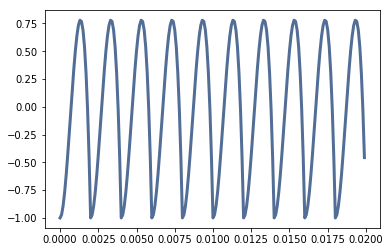

In [157]:
segment.plot()

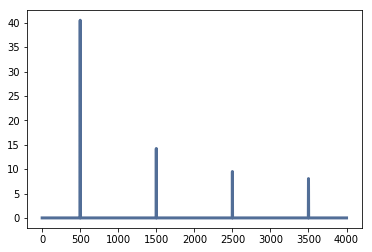

In [271]:

# spectrum = wave.make_spectru?m(norm="ortho")
spectrum.plot()




In [290]:
# plt.clf()
# wave = thinkdsp.read_wave(os.path.join(path, "wave1.wav"))
# spectrum = wave.make_spectrum(normalization=None)
# wave.apodize()
# spectrum.plot()


# Problem set questions 

## 1.a. Load a signal and observe waveform to classify it:

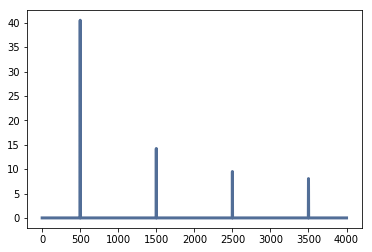

In [273]:
# from wave import open as open_wave
fp = open_wave("/Users/danielmlow/Dropbox/shbt/acoustics/07/wave1.wav", 'r')

# # print(fp.getframerate())
# fp.close()
# So you know frame-rate is 8000 samples. 

In [256]:
# Load 
# wave = thinkdsp.read_wave(os.path.join(path, "wave1.wav"))
# [n*10 for n in list(wave.ys[:100])]
# wave.apodize()
# wave.make_audio()
# print(wave.duration)

In [237]:
# plot wave form
for i in range(1,4):
    plt.clf()
    wave = thinkdsp.read_wave(os.path.join(path, "wave"+str(i)+".wav"))
    thinkplot.config(xlim= [0,0.02], xlabel='Time (seconds)', ylabel='Amplitude')
    wave.plot()
    thinkplot.save(root=os.path.join(path, 'images/waveform_w'+str(i)), formats=['png'])

Writing /Users/danielmlow/Dropbox/shbt/acoustics/07/images/waveform_w1.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/07/images/waveform_w2.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/07/images/waveform_w3.png


In [169]:
os.path.join(path, 'images/waveform_w'+str(i))


'/Users/danielmlow/Dropbox/shbt/acoustics/07/images/waveform_w1'

## 1.b. What is the periodicity of each waveform? 

In [259]:
# One method is seeing where the vector goes back to the starting y value to get .
[(n*10).round(2) for n in list(wave.ys[:17])] #If on 17, the cycle repeats, on 16 the cycle ends.


#  Another method is doing the spectrum analysis and seeing what the frequency is to then infer the periodicity (see section 1.3.)

[0.0,
 1.25,
 2.5,
 3.75,
 5.0,
 6.25,
 7.5,
 8.75,
 -10.0,
 -8.75,
 -7.5,
 -6.25,
 -5.0,
 -3.75,
 -2.5,
 -1.25,
 -0.0]

In [213]:
# plot 2 msec:
for i in range(1,4):
    wave = thinkdsp.read_wave(os.path.join(path,"wave"+str(i)+".wav"))
    thinkplot.config(xlim = [0.040, 0.042], xlabel='Time (seconds)', ylabel='Amplitude ')
    wave.plot()
    thinkplot.save(root=os.path.join(path, 'images/period_w'+str(i)), formats=['png'])

Writing /Users/danielmlow/Dropbox/shbt/acoustics/07/images/period_w1.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/07/images/period_w2.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/07/images/period_w3.png


## Make spectrums

In [224]:
spectrum = wave.make_spectrum()
spectrum.plot()

for i in range(1,4):
    wave = thinkdsp.read_wave(os.path.join(path,"wave"+str(i)+".wav"))
    thinkplot.config(xlabel='Frequency (Hz)',
                     ylabel='Amplitude')
    spectrum = wave.make_spectrum()
    spectrum.plot()
    thinkplot.save(root=os.path.join(path, 'images/spectrum_w'+str(i)), formats=['png'])


Writing /Users/danielmlow/Dropbox/shbt/acoustics/07/images/spectrum_w1.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/07/images/spectrum_w2.png
Writing /Users/danielmlow/Dropbox/shbt/acoustics/07/images/spectrum_w3.png


In [248]:
# spectrogram = wave.make_spectrogram(seg_length=512)
# spectrogram.plot(high=700)

# 4. Downsample

In [262]:
def sample(wave, factor):
    """Simulates sampling of a wave.
    
    wave: Wave object
    factor: ratio of the new framerate to the original
    """
    ys = np.zeros(len(wave))
    ys[::factor] = wave.ys[::factor]
    return thinkdsp.Wave(ys, framerate=wave.framerate) 

Writing /Users/danielmlow/Dropbox/shbt/acoustics/07/images/spectrum_w3.png


In [267]:
wave = thinkdsp.read_wave(os.path.join(path,"wave3.wav"))
wave.make_audio()

## 4.1. sample every 2

In [264]:
sampled = sample(wave, 2)
sampled.make_audio()
spectrum = sampled.make_spectrum()
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')
spectrum.plot()
thinkplot.save(root=os.path.join(path, 'images/spectrum_w3_subsample_x2'), formats=['png'])



Writing /Users/danielmlow/Dropbox/shbt/acoustics/07/images/spectrum_w3_subsample_x2.png


## 4.2. sample every 10

In [266]:
sampled = sample(wave, 10)
sampled.make_audio()


In [ ]:
spectrum = sampled.make_spectrum()
thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude')
spectrum.plot()
thinkplot.save(root=os.path.join(path, 'images/spectrum_w3_subsample_x10'), formats=['png'])
